In [1]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model as sk



/Users/krader/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_heart = pd.read_csv('Heart.csv')
df_heart.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


ValueError: could not convert string to float: 'No'

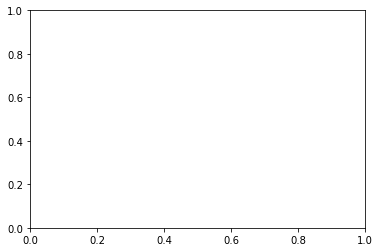

In [3]:
plt.plot(df_heart.MaxHR, df_heart.AHD, 'o', alpha=0.1)
#uh-oh, that's not good :(

/Users/krader/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[<matplotlib.text.Text at 0x120a39ac8>, <matplotlib.text.Text at 0x120a46f28>]

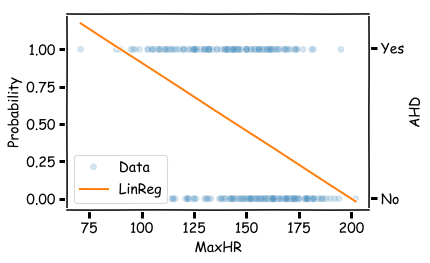

In [4]:
from sklearn import linear_model

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("MaxHR")
host.set_ylabel("Probability")


par1.set_ylabel("AHD")



color1 = plt.cm.viridis(0)

data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(data_x.reshape(-1,1), data_y.reshape(-1,1))

# Make predictions using the testing set
x=np.linspace(np.min(data_x),np.max(data_x))
y_ = regr.predict(x.reshape(-1,1))

host.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
host.plot(x, y_, label='LinReg')
host.legend(loc=3)

labels = ['No', 'Yes']

# You can specify a rotation for the tick labels in degrees or with keywords.
par1.set_yticks( [0.061, 0.83])
par1.set_yticklabels(labels)

In [5]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.values.reshape(-1,1), data_y);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04326016]]
Estimated beta0: 
 [ 6.30193148]


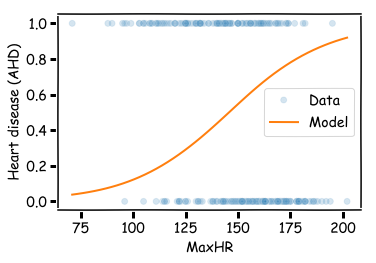

In [12]:

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
y_ = logreg.predict_proba(x.reshape(-1,1))[:,0]
plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,y_, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")



plt.savefig('FittingLogR2.png', dpi=300, transparent=True)

## Multiple Logistic Regression

Just like in linear regression, the logistic regression model can be extended to incorporate multiple predictors/features.  The logistic model (written in the log-odds format) can then be written as:
$$ \ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \beta_0+\beta_1 X_1+\dots+\beta_p X_p .$$
Maximum likelihood methods can still be used to generate estimates for the $p+1$ parameters: $\beta_0,\beta_1,\dots,\beta_p $.

In [13]:
data_x = df_heart[['MaxHR','Sex']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04496354  1.40079047]]
Estimated beta0: 
 [ 5.58662464]


## Regularization in Logistic Regression

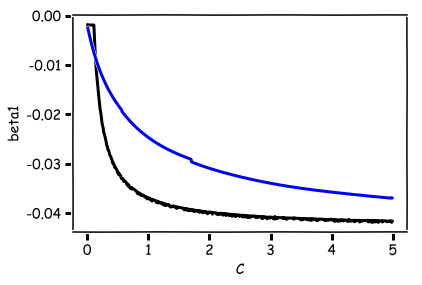

In [18]:
beta1_l1 = []
beta1_l2 = []
Cs = []
data_x = df_heart[['MaxHR']]
data_y = df_heart['AHD']

for i in range(1, 500):
    C = i/100
    logitm_l1 = sk.LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit (data_x, data_y)
    logitm_l2 = sk.LogisticRegression(C = C, penalty = "l2")
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.show()


## Logistic Regression for $Y$ with more than 2 Categories

There are several extensions to standard logistic regression when the response variable $Y$ has more than 2 categories.  The two most common are ordinal logistic regression and multinomial logistic regression.  Ordinal logistic regression is used when the categories have a specific hierarchy (like class year: Freshman, Sophomore, Junior, Senior; or a 7-point rating scale from strongly disagree to strongly agree).  Multinomial logistic regression is used when the categories have no inherent order (like eye color: blue, green, brown, hazel, et...).

In [21]:
#read the NFL play-by-play data
nfldata = pd.read_csv("NFLplaybyplay-2015.csv")

# shuffle the data
nfldata = nfldata.reindex(np.random.permutation(nfldata.index))

# For simplicity, we will select only 500 points form the dataset.
N = 500

X = nfldata[["YardLine"]]

nfldata["PlayType"]=nfldata["IsPass"]+2*nfldata["IsRush"]

logitm = sk.LogisticRegression(C = 10000000)
logitm.fit (X, nfldata["PlayType"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)


Estimated beta1: 
 [[-0.01460736]
 [ 0.00635893]
 [ 0.00652455]]
Estimated beta0: 
 [-0.26422696 -0.61186328 -1.20051275]


In [33]:
X=np.arange(100)
print(logitm.predict_proba(X.reshape(-1,1))[0:10,:])
print(logitm.predict(X.reshape(-1,1)))

[[ 0.42692074  0.34563977  0.22743948]
 [ 0.42380137  0.34739801  0.22880062]
 [ 0.42067735  0.34915746  0.23016519]
 [ 0.41754902  0.35091792  0.23153306]
 [ 0.41441671  0.35267918  0.23290411]
 [ 0.41128078  0.35444103  0.23427819]
 [ 0.40814155  0.35620326  0.23565519]
 [ 0.40499938  0.35796565  0.23703497]
 [ 0.40185462  0.35972799  0.23841739]
 [ 0.39870763  0.36149006  0.23980231]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
